In [1]:
%matplotlib inline

In [2]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

In [3]:
sg = nb.load("/home/julia/data/gradients/atlas/allen_api/layers/supragranular_200.nii.gz").get_data()
ig = nb.load("/home/julia/data/gradients/atlas/allen_api/layers/infragranular_200.nii.gz").get_data()
gradients = nb.load("/home/julia/data/gradients/results/embedding_vol/embed.nii.gz").get_data()[:,:,:,:6]
pv = nb.load("/home/julia/data/gradients/atlas/interneurons/pv2allen.nii.gz").get_data()
sst = nb.load("/home/julia/data/gradients/atlas/interneurons/sst2allen.nii.gz").get_data()
vip = nb.load("/home/julia/data/gradients/atlas/interneurons/vip2allen.nii.gz").get_data()
pv_sst = nb.load("/home/julia/data/gradients/atlas/interneurons/pv_sst2allen.nii.gz").get_data()

### Checking distribution of gradients in supra- and infragranular layers

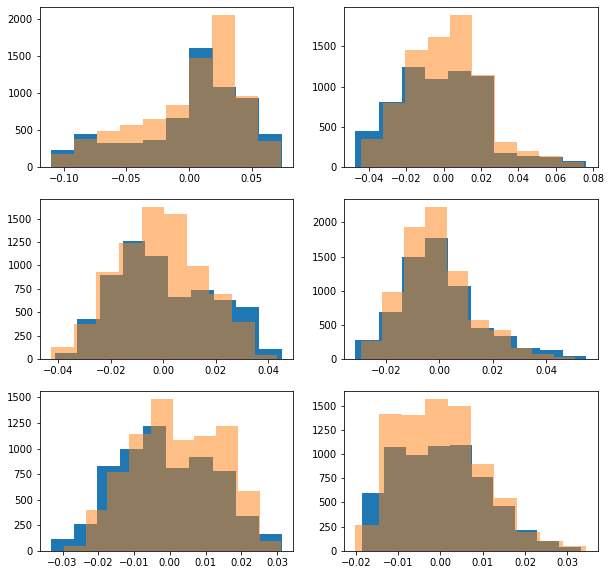

In [4]:
fig = plt.figure(figsize=(10,10))
for g in range(6):
    fig.add_subplot(3,2,g+1)
    plt.hist(gradients[:,:,:,g][sg==1])
    plt.hist(gradients[:,:,:,g][ig==1], alpha=0.5)

Along the gradients, there doesn't seem to be a substantial difference between supra- and infragranular values. I.e. the gradients appear to run mostly orthogonal to the cortical depth dimension

### Distribution of interneurons along gradients in supra- vs infragranular layers

In [26]:
names = ["pv", "sst", "vip", "pv_sst"]
images = [pv, sst, vip, pv_sst]

for g in range(6):
    for i in range(len(images)):
        r = stats.spearmanr(gradients[:,:,:,g][sg==1], images[i][sg==1])
        if r[1]<0.05:
            if r[0]>0.2:
                print('Gradient %i, %s:' %(g, names[i]), r)

Gradient 2, pv: SpearmanrResult(correlation=0.23417806766129351, pvalue=6.9319479517543238e-81)
Gradient 2, pv_sst: SpearmanrResult(correlation=0.27917109311532934, pvalue=1.6005322852391082e-115)


In [29]:
names = ["pv", "sst", "vip", "pv_sst"]
images = [pv, sst, vip, pv_sst]

for g in range(6):
    for i in range(len(images)):
        r = stats.spearmanr(gradients[:,:,:,g][ig==1], images[i][ig==1])
        if r[1]<0.05:
            if r[0]>0.2:
                print('Gradient %i, %s:' %(g, names[i]), r)

Gradient 0, vip: SpearmanrResult(correlation=0.27250423285228209, pvalue=1.5660220078549929e-135)
Gradient 0, pv_sst: SpearmanrResult(correlation=0.20574450700192104, pvalue=7.9972476526090622e-77)
Gradient 2, pv: SpearmanrResult(correlation=0.33070394805374675, pvalue=2.0509717516824387e-202)
Gradient 2, pv_sst: SpearmanrResult(correlation=0.39678015848938142, pvalue=2.327730692596854e-298)
Gradient 5, pv: SpearmanrResult(correlation=0.21435189685644732, pvalue=2.2334415407273742e-83)
Gradient 5, pv_sst: SpearmanrResult(correlation=0.29850002099214928, pvalue=1.6824719442433575e-163)


### In Layer 2/3

In [6]:
l23 = nb.load("/home/julia/data/gradients/atlas/allen_api/layers/l2_3_200.nii.gz").get_data()


In [7]:
names = ["pv", "sst", "vip", "pv_sst"]
images = [pv, sst, vip, pv_sst]

for g in range(6):
    for i in range(len(images)):
        r = stats.spearmanr(gradients[:,:,:,g][l23==1], images[i][l23==1])
        if r[1]<0.05:
            if r[0]>0.2:
                print('Gradient %i, %s:' %(g, names[i]), r)

Gradient 0, vip: SpearmanrResult(correlation=0.35308530964918267, pvalue=7.0853160986048888e-113)
Gradient 2, pv: SpearmanrResult(correlation=0.31336433291106963, pvalue=4.7249648417862069e-88)
Gradient 2, pv_sst: SpearmanrResult(correlation=0.29741453350708902, pvalue=4.2724298621978674e-79)
Gradient 4, sst: SpearmanrResult(correlation=0.22993201985726244, pvalue=3.8374187268430384e-47)
